In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
%matplotlib inline

E:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 观察数据
auto_prices = pd.read_csv('data/Automobile price data _Raw.csv')
auto_prices.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
# 重新编码 colums 的名称
auto_prices.columns = [str.replace('-', '_') for str in auto_prices.columns]

In [4]:
auto_prices.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [5]:
# 处理缺失值
# 找到存在？类型的列
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [6]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x=='?']
        print(col + ' ' + str(sum(count)))

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [8]:
auto_prices.drop('normalized_losses', axis=1, inplace=True)
cols = ['num_of_doors', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for column in cols:
    auto_prices.loc[auto_prices[column]=='?', column] = np.nan
auto_prices.dropna(axis=0, inplace=True)
auto_prices.shape

(193, 25)

In [11]:
# 转换列的数据类型
cols = [ 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
auto_prices[cols].dtypes

bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
price           int64
dtype: object

# 特征工程

In [15]:
auto_prices.num_of_cylinders.value_counts()

four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [16]:
# 将数据分段组合，具体可自由探索，能清楚地表现区间数据差异
cylinder_categories = {'three':'three_four', 'four':'three_four',
                      'five':'five_six', 'six':'five_six',
                      'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices.num_of_cylinders.value_counts()

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

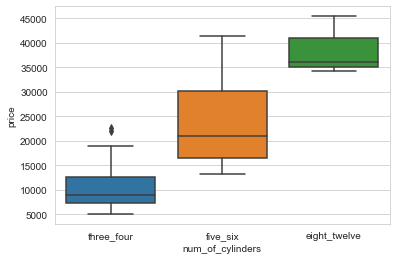

In [17]:
# 使用箱型图
def plot_box(auto_prices, col, col_y='price'):
    sns.set_style('whitegrid')
    sns.boxplot(col, col_y, data=auto_prices)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
plot_box(auto_prices, 'num_of_cylinders')

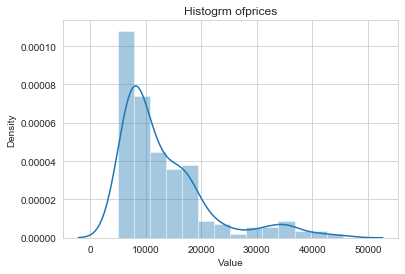

In [18]:
# 变量转换，分布图显示
def hist_plot(vals, lab):
    sns.distplot(vals)
    plt.title('Histogrm of' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
hist_plot(auto_prices.price, 'prices')

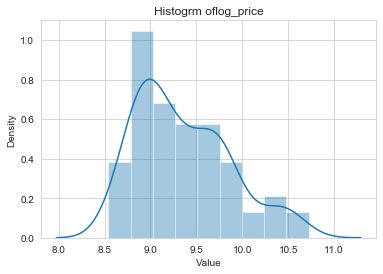

In [20]:
# 数值log转换，是显示更容易观察
auto_prices['log_price'] = np.log(auto_prices.price)
hist_plot(auto_prices['log_price'], 'log_price')

In [ ]:
# 可视化
def plot_scatter_shape(auto_prices, cols, shape_col='fuel_type', col_y='log_price', alpha=0.2):
    shapes = ['+', 'o', 's', 'x', '^']
    unique_cats = auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i, cat in enumerate(uni)
    

In [22]:
unique_cats = auto_prices['fuel_type'].unique()
unique_cats

array(['gas', 'diesel'], dtype=object)